In [179]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.discriminant_analysis as da
import sklearn.neighbors as knn

In [180]:
# importing Auto dataset
auto = pd.read_csv('Auto.csv')
auto = auto.drop(['Unnamed: 0', 'name', 'origin','year'], axis=1)
auto = auto.dropna() # Dropping empty rows

In [181]:
mpg = auto['mpg'] # isolating mpg from dataset
median = mpg.median() # getting median from dataset

mpg01 = pd.DataFrame({'mpg01': np.where(mpg > median, 1, np.where(mpg < median, 0, 0))}) # creating pandas dataFrame

bk_auto = auto # create copy of auto datset

print(mpg01)
auto = auto.join(mpg01) # adding mpg01 to pandas dataFrame
print(auto)

     mpg01
0        0
1        0
2        0
3        0
4        0
..     ...
387      1
388      1
389      1
390      1
391      1

[392 rows x 1 columns]
      mpg  cylinders  displacement  horsepower  weight  acceleration  mpg01
0    18.0          8         307.0         130    3504          12.0      0
1    15.0          8         350.0         165    3693          11.5      0
2    18.0          8         318.0         150    3436          11.0      0
3    16.0          8         304.0         150    3433          12.0      0
4    17.0          8         302.0         140    3449          10.5      0
..    ...        ...           ...         ...     ...           ...    ...
387  27.0          4         140.0          86    2790          15.6      1
388  44.0          4          97.0          52    2130          24.6      1
389  32.0          4         135.0          84    2295          11.6      1
390  28.0          4         120.0          79    2625          18.6      1
391  31.

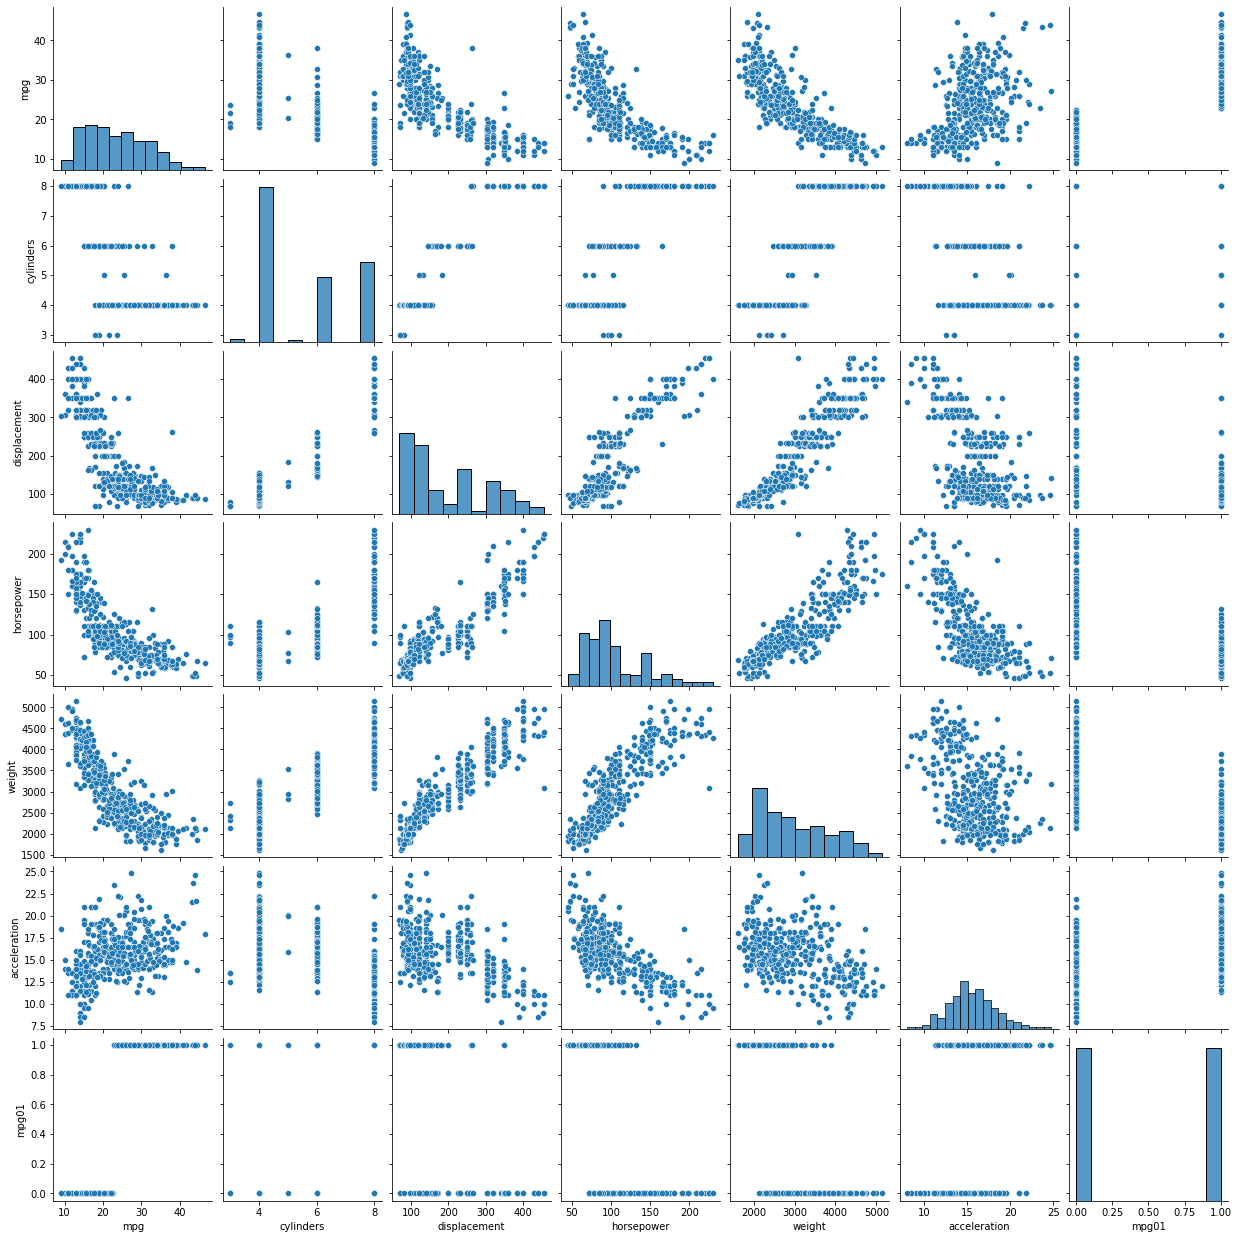

In [182]:
# exploring data graphically to see any relation with mpg01
sb.pairplot(auto)
plt.show()

In [183]:
# training LDA and testing model accuracy
X_train, X_test, y_train, y_test = train_test_split(bk_auto.values, auto['mpg01'], test_size=0.20) # splitting data

LDA = da.LinearDiscriminantAnalysis() # loading LDA from sklearn
model_LDA = LDA.fit(X_train,y_train) # fitting model
lda_accuracy = model_LDA.score(X_test, y_test) # mean accuracy of LDA model
print('<----------------- LDA model ------------------------>')
print(lda_accuracy)

<----------------- LDA model ------------------------>
0.9240506329113924


In [184]:
# training QDA and testing model accuracy
QDA = da.QuadraticDiscriminantAnalysis()
model_qda = QDA.fit(X_train,y_train) # fitting model
qda_accuracy = model_qda.score(X_test, y_test) # mean accuracy of QDA model
print('<----------------- QDA model ------------------------>')
print(qda_accuracy)

<----------------- QDA model ------------------------>
0.9113924050632911


In [185]:
# training logistic regression and testing model accuracy
LR = LogisticRegression(max_iter=1000) # loading model and initializing a max number of iterations
model_lr = LR.fit(X_train, y_train)
lr_accuracy = model_lr.score(X_test, y_test) # mean accuracy of QDA model
print('<----------------- Logistic regression model ------------------------>')
print(lr_accuracy)

<----------------- Logistic regression model ------------------------>
0.9873417721518988


In [186]:
# training KNN and testing model accuracy
KNN2 = knn.KNeighborsClassifier(2) # loading KNN models
KNN20 = knn.KNeighborsClassifier(20)
model_knn2 = KNN2.fit(X_train,y_train) # fitting model
model_knn20 = KNN20.fit(X_train,y_train)
knn2_accuracy = model_knn2.score(X_test, y_test) # mean accuracy of knn model with neighbor of 3
knn20_accuracy = model_knn20.score(X_test, y_test) # mean accuracy of knn model with neighbor of 10
print('<----------------- KNN models ------------------------>')
print(knn2_accuracy)
print(knn20_accuracy)

<----------------- KNN models ------------------------>
0.8607594936708861
0.8987341772151899
